In [16]:
import pandas as pd
import plotly.express as px

In [17]:
df = pd.read_csv(r"C:\Users\User\personal-finance-dashboard\Personal_Finance_Dataset.csv", parse_dates=["Date"])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.to_period("M").astype(str)
df.head()

,Date,Transaction Description,Category,Amount,Type,Year,Month
0,2020-01-02,Score each.,Food & Drink,1485.69,Expense,2020,2020-01
1,2020-01-02,Quality throughout.,Utilities,1475.58,Expense,2020,2020-01
2,2020-01-04,Instead ahead despite measure ago.,Rent,1185.08,Expense,2020,2020-01
3,2020-01-05,Information last everything thank serve.,Investment,2291.00,Income,2020,2020-01
4,2020-01-13,Future choice whatever from.,Food & Drink,1126.88,Expense,2020,2020-01


# Overall Financial Summary

In [9]:
income_total = df[df["Type"] == "Income"]["Amount"].sum()
expense_total = df[df["Type"] == "Expense"]["Amount"].sum()
net_total = income_total - expense_total

print(f"Income: ${income_total:,.2f}")
print(f"Expenses: ${expense_total:,.2f}")
print(f"Net Balance: ${net_total:,.2f}")

Income: $734,087.00
Expenses: $1,227,194.37
Net Balance: $-493,107.37


# Monthly Income vs Expense

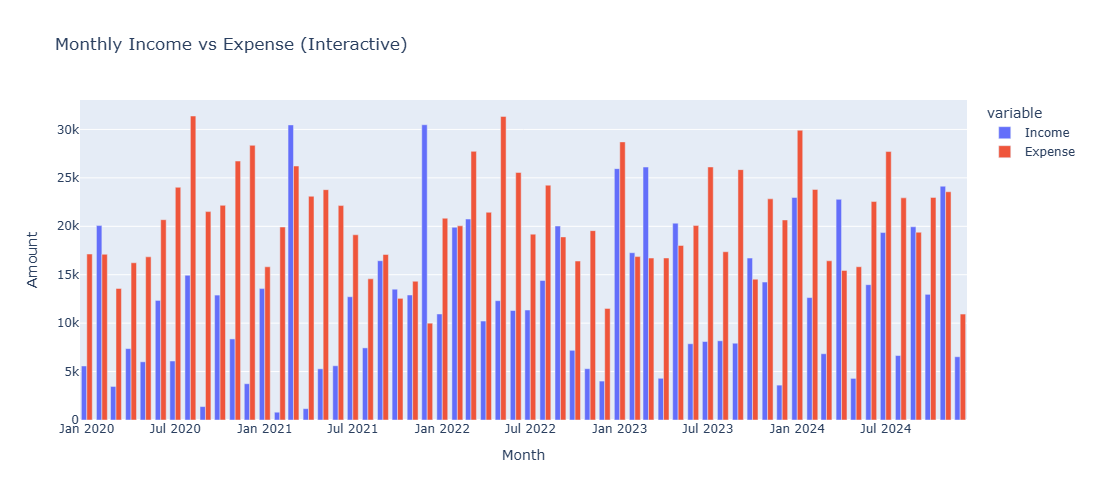

In [10]:
monthly_summary = df.groupby(['Month', 'Type'])['Amount'].sum().unstack().fillna(0)
monthly_summary['Net'] = monthly_summary['Income'] - monthly_summary['Expense']
monthly_summary_reset = monthly_summary.reset_index()

fig1 = px.bar(monthly_summary_reset, x='Month', y=['Income', 'Expense'],
              title="Monthly Income vs Expense (Interactive)",
              labels={'value': 'Amount', 'Month': 'Month'}, barmode='group', height=500)
fig1.show()

# Net Income Over Time

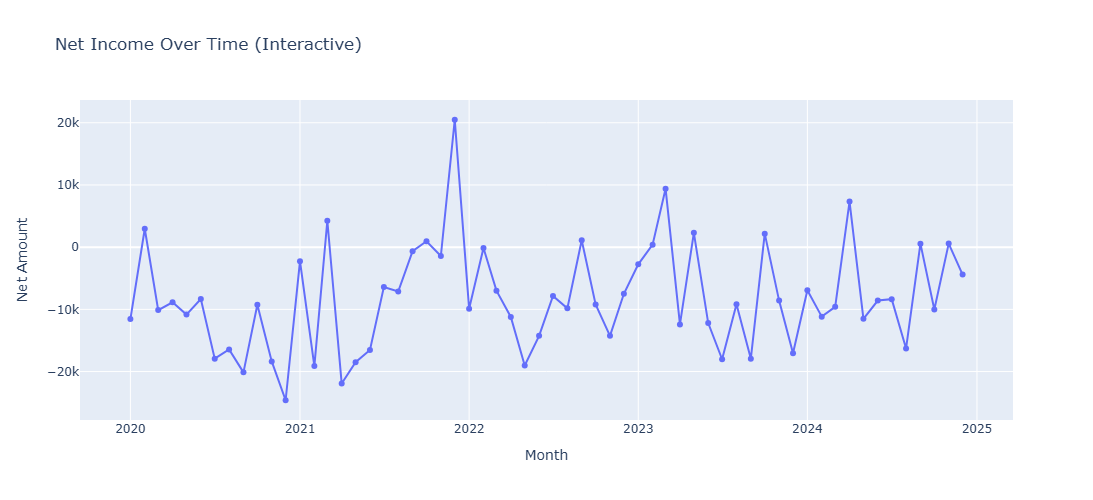

In [11]:
fig2 = px.line(monthly_summary_reset, x='Month', y='Net', markers=True,
               title="Net Income Over Time (Interactive)",
               labels={'Net': 'Net Amount', 'Month': 'Month'}, height=500)
fig2.show()

# Total Expenses by Category

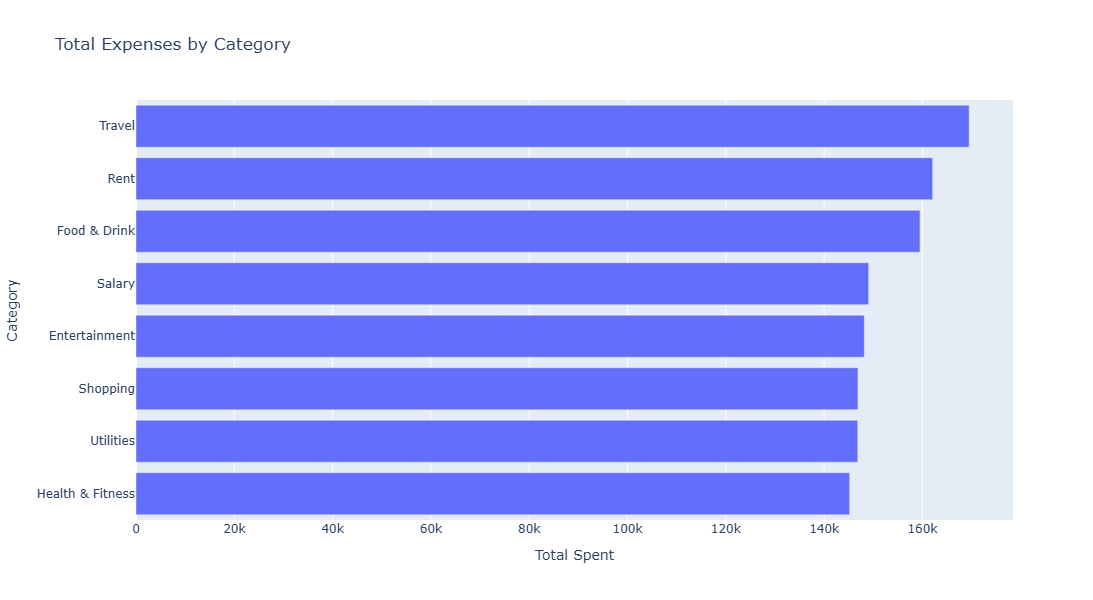

In [12]:
expense_df = df[df['Type'] == 'Expense'].groupby('Category')['Amount'].sum().sort_values(ascending=True).reset_index()
expense_df.columns = ['Category', 'Amount']

fig3 = px.bar(expense_df, x='Amount', y='Category', orientation='h',
              title="Total Expenses by Category",
              labels={'Amount': 'Total Spent', 'Category': 'Category'}, height=600)
fig3.show()

# Yearly Trends: Income, Expenses, Net

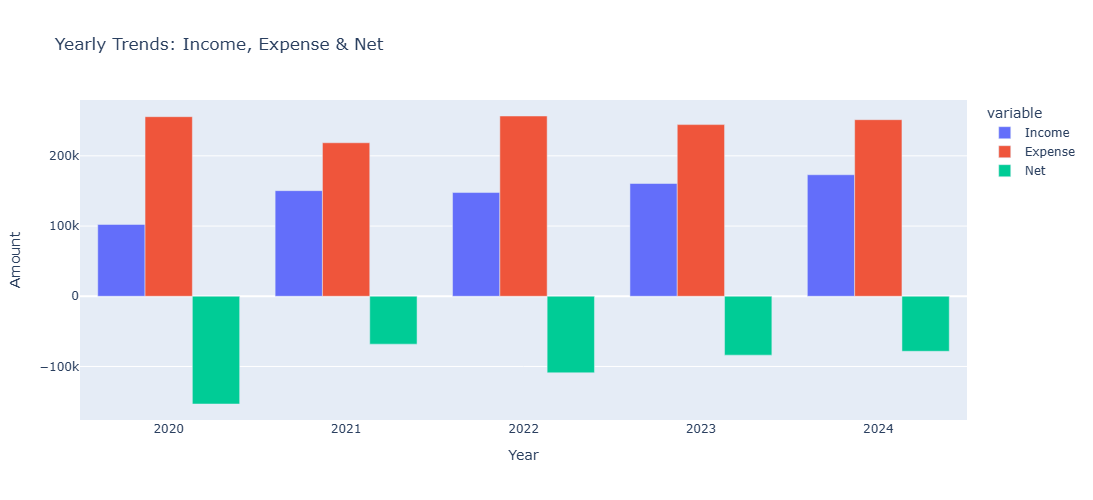

In [13]:
yearly_summary = df.groupby(['Year', 'Type'])['Amount'].sum().unstack().fillna(0)
yearly_summary['Net'] = yearly_summary['Income'] - yearly_summary['Expense']
yearly_summary_reset = yearly_summary.reset_index()

fig4 = px.bar(yearly_summary_reset, x='Year', y=['Income', 'Expense', 'Net'],
              title="Yearly Trends: Income, Expense & Net",
              labels={'value': 'Amount', 'Year': 'Year'},
              barmode='group', height=500)
fig4.show()

# Yearly Category Expense Breakdown

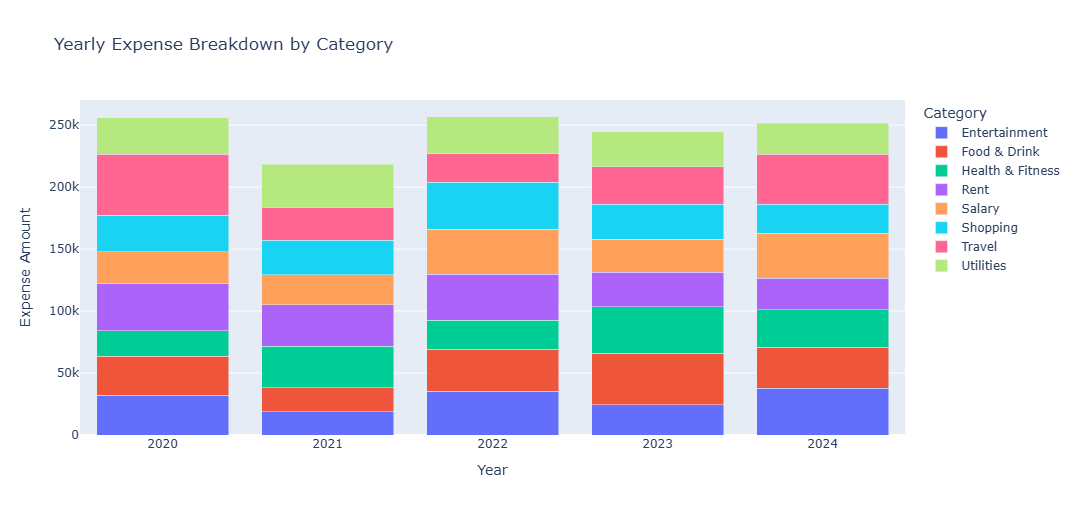

In [14]:
yearly_category = df[df['Type'] == 'Expense'].groupby(['Year', 'Category'])['Amount'].sum().reset_index()

fig5 = px.bar(yearly_category,x='Year',y='Amount',color='Category',
              title="Yearly Expense Breakdown by Category",labels={'Amount': 'Expense Amount'}, height=500)
fig5.update_layout(barmode='stack')
fig5.show()

# Expense Category Share

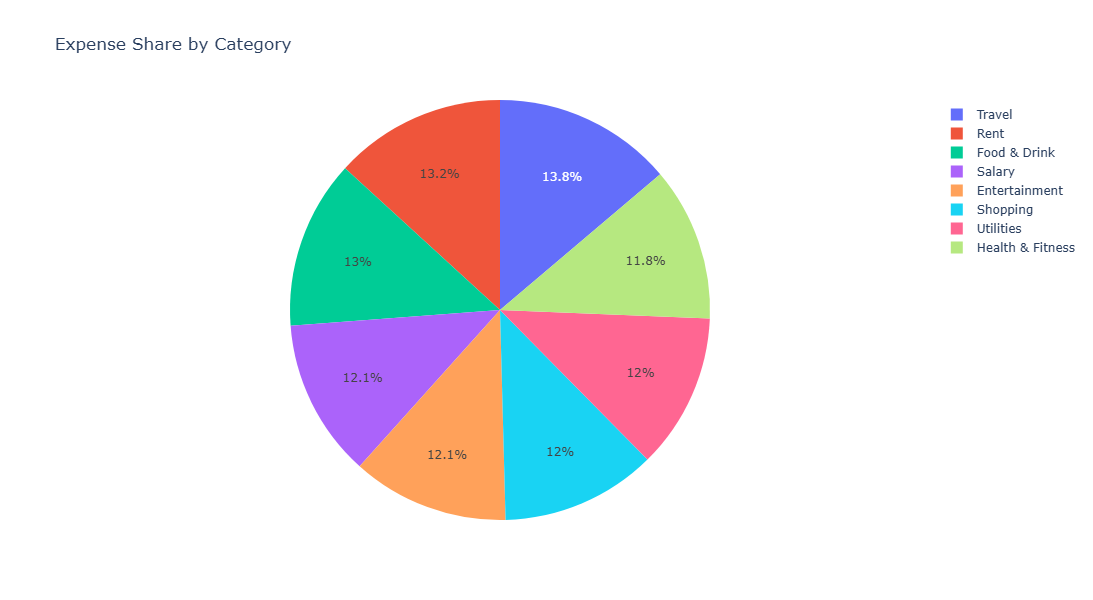

In [15]:
fig6 = px.pie(expense_df, names='Category', values='Amount',
              title="Expense Share by Category",
              height=600)
fig6.show()